# Exercise Eleven: PCA

Drawing on our example from class and the discussion of PCA in Data-Sitters Club, 

- Import at least ten documents from files, using the OS module and any others relevant to process the text
- Isolate a component (the example was nouns - try verbs or adjectives) using nltk and prepare appropriate sub-files for comparison on that axis
- Load the documents and titles and run the contents through vectorize, using the provided boilerplate
- Run a simple (2 word) vizualization comparing all texts
- Run a full (PCA) vizualization comparing all texts using the provided PCA boilerplate. Note any interesting characteristics or outliers in a brief analysis

Bonus Challenge: Depending on your interests, you might either try using an API to collect the texts rather than saving them to a directory, or you might use Bokeh to attempt an exportable visualization of some aspect of what you've collected.

Importing ten books by Arhtur Conan Doyle.  8 are about Sherlock Holmes, 2 are non-Holmes stories.  This is to take an initial look at word consistency in Doyle's writing on Holmes and look and two potential outliers.  Using the OS module and any others relevant to process the text

In [1]:
import nltk 
nltk.download('averaged_perceptron_tagger')

import os

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Stoddard\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [19]:
textdir = 'C:\\Users\\Stoddard\\DesignDevExercises\\text\\'
os.chdir(textdir)

Isolating the nouns using nltk and preparing appropriate sub-files for comparison on that axis.

THis was the only part of speech that completley worked.  I succesfully isolated and reloaded adverbs and adjectives.  However, each failed at the vectorization stage.  

In [22]:
#For each filename in the directory you listed...
for filename in os.listdir(textdir):
    #If the filename ends with .txt...
    if filename.endswith('.txt'):
        #Create an output name that adds '-nouns' to the filename
        outname = filename.replace('.txt','-nouns.txt')
        #Open the file
        # UTF 8 character encoding, must match the file I use
        with open(filename, 'r', encoding="utf-8") as f:
            #Open the output file
            with open(outname, 'w') as out:
                #Read the text from the file
                text = f.read()
                #Split the text into a list of sentences
                sentences = nltk.sent_tokenize(text)
                #For each sentence in the list of sentences...
                for sentence in sentences:
                    #For each word and each part-of-speech tag that you get
                    #When NLTK tokenizes the sentence (splitting words from punctuation, etc.)
                    for word,pos in nltk.pos_tag(nltk.word_tokenize(str(sentence))):
                        #If the part-of-speech is noun
                        if (pos == 'NN' or pos == 'NNS'):
                        #You can sub in other parts of speech, too
                        #Just comment out the noun code, and uncomment one of these
                        #Adverbs
                        #if (pos == 'RB' or pos == 'RBR' or pos == 'RBS'):
                        #Adjectives
                        #if (pos == 'JJ' or pos == 'JJR' or pos == 'JJS'):
                        #Verbs
                        #if (pos == 'VB' or pos == 'VBD' or pos == 'VBG' or pos == 'VBN' or pos == 'VBP' or pos == 'VBZ'):
                            #Write the word (which should be a noun) to the output file
                            out.write(word)
                            #Write a space so the words don't smush together
                            out.write(' ')

                            # This will create a txt file, keep them in git ignore

Loading the noun files of the 10 books and running the contents through vectorize, using the provided boilerplate.

In [23]:
# This will load in the new -noun.txt files
def load_directory(directory, max_length):
    documents, titles = [], []
    for filename in os.scandir(directory):
        #change this to analyze a different component after changing the save above
        if not filename.name.endswith('-nouns.txt'):
            continue

        with open(filename.path) as f:
            contents = f.read()
        lemmas = contents.lower().split()
        start_idx, end_idx, segm_cnt = 0, max_length, 1

        # extract slices from the text:
        while end_idx < len(lemmas):
            documents.append(' '.join(lemmas[start_idx:end_idx]))
            title = filename.name.replace('-nouns.txt', '')
            titles.append(f"{title}-{segm_cnt}")

            start_idx += max_length
            end_idx += max_length
            segm_cnt += 1

    return documents, titles
    # Prepares our text with nltk for machine processing anlaysis
    

In [25]:
# Vectorizor
documents, titles = load_directory(textdir, 10000)
import sklearn.feature_extraction.text as text
print(titles[6])
# Looks for patterns of occurance of words, this pulls 30 words from the 10 texts to build an array
vectorizer = text.CountVectorizer(max_features=30, token_pattern=r"(?u)\b\w+\b")
v_documents = vectorizer.fit_transform(documents).toarray()
# Creates plotable to data pieces
print(v_documents.shape)
print(vectorizer.get_feature_names()[:10])

fear-1
(14, 30)
['case', 'country', 'day', 'door', 'end', 'enemy', 'eyes', 'face', 'fire', 'force']


Run a sample of 'enemy' and 'eyes' vizualization comparing all texts

[Text(0, 0.5, 'eyes'), Text(0.5, 0, 'enemy')]

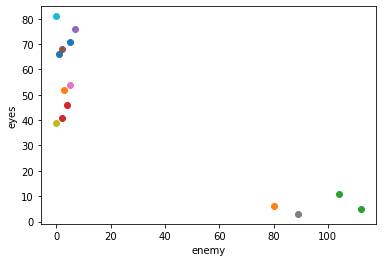

In [26]:
# Visualizing the data, based on 2 chosen words
import matplotlib.pyplot as plt
import numpy as np

words = vectorizer.get_feature_names()
titles = np.array(titles)
x = v_documents[:, words.index('enemy')]
y = v_documents[:, words.index('eyes')]

fig, ax = plt.subplots()
for title in set(titles):
    ax.scatter(x[titles==title], y[titles==title], label=title)
ax.set(xlabel='enemy', ylabel='eyes')
# plt.legend();


Run a full (PCA) vizualization comparing all texts using the provided PCA boilerplate. Note any interesting characteristics or outliers in a brief analysis

In [41]:
# This allows or visualization of more than just 2 chosen words
# Reduceces the 10 30 into a vectorable 10 2
import sklearn.decomposition

pca = sklearn.decomposition.PCA(n_components=2)
documents_proj = pca.fit_transform(v_documents)

print(v_documents.shape)
print(documents_proj.shape)

(14, 30)
(14, 2)


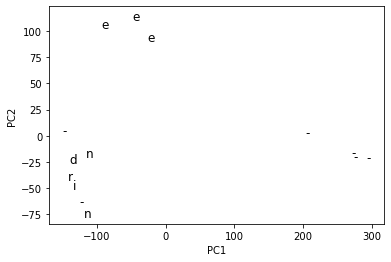

In [44]:
# I'm not sure why this plotted with letters instead of numbers.  I used the boilerplate code from the PCA demo.

# THis plots the books as they relate to simialr noun usage
c1, c2 = documents_proj[:, 0], documents_proj[:, 1]

fig, ax = plt.subplots()
ax.scatter(c1, c2, facecolors='none')

for p1, p2, title in zip(c1, c2, titles):
    ax.text(p1, p2, title[4], fontsize=12,
            ha='center', va='center')

ax.set(xlabel='PC1', ylabel='PC2');
# book 0 is book 10